In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Carregando o conjuntos de dodos

● Pinguins (penguins)

● Gorjetas (tips)

● Titanic (titanic)

● Quarteto anscombe (anscombe)

In [106]:
df_pinguins = sns.load_dataset('penguins')
df_gorjetas = sns.load_dataset('tips')
df_titanic = sns.load_dataset('titanic')
df_anscombe = sns.load_dataset('anscombe')

#### Analisando o dataset dos pinguins

In [107]:
df_pinguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [108]:
df_pinguins.shape

(344, 7)

In [109]:
#verificando os tipos de dados
df_pinguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [110]:
list(df_pinguins.columns)

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

criando um dicionario de dados

In [111]:
dc_pinguins = pd.DataFrame({
    'coluna':['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex'],
    'descricao':['especie do pinguin', 'ilha onde a especie foi encontrada', 'comprimento do bico', 'profundidade do bico','comprimento da nadadeira ', 'massa corporal','sexo'],
    'tipo_dado_e':['categorico', 'categorico','numerico', 'numerico','numerico','numerico', 'categorico'],
    'tipo_dado':['Object', 'Object', 'Float64', 'Float64', 'Float64', 'Float64', 'Object']




})


In [112]:
dc_pinguins

,coluna,descricao,tipo_dado,tipo dado
0,species,especie do pinguin,categorico,Object
1,island,ilha onde a especie foi encontrada,categorico,Object
2,bill_length_mm,comprimento do bico,numerico,Float64
3,bill_depth_mm,profundidade do bico,numerico,Float64
4,flipper_length_mm,comprimento da nadadeira,numerico,Float64
5,body_mass_g,massa corporal,numerico,Float64
6,sex,sexo,categorico,Object


In [113]:
df_pinguins['species'].value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

Text(0.5, 1.0, 'Especies de Pinguins por Ilha  ')

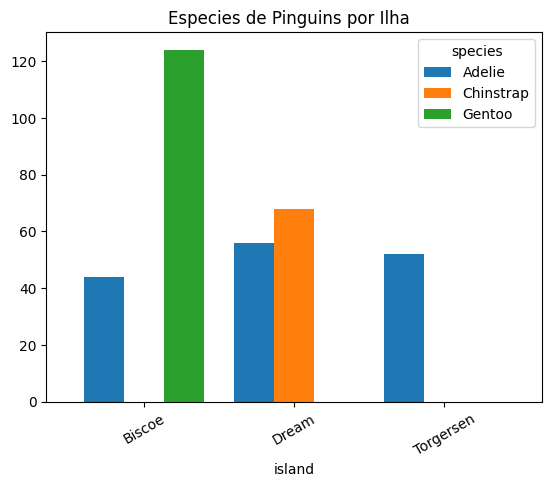

In [114]:
df_pinguins.groupby(['island','species']).size().unstack().plot(kind='bar', width=0.8, rot=30)
plt.title('Especies de Pinguins por Ilha  ')

###Descricao dos dados utilizando medidades de tendencia central, calcula da media, mediana e moda

A funcao describe do pandas nos fornece dados importantes  sobre tendencia central e variancia,

In [115]:

df_pinguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


calculando a moda para as variaveis numericas

In [116]:
df_pinguins['bill_length_mm'].mode(), df_pinguins['bill_depth_mm'].mode(),df_pinguins['flipper_length_mm'].mode(),df_pinguins['body_mass_g'].mode()


(0    41.1
 Name: bill_length_mm, dtype: float64,
 0    17.0
 Name: bill_depth_mm, dtype: float64,
 0    190.0
 Name: flipper_length_mm, dtype: float64,
 0    3800.0
 Name: body_mass_g, dtype: float64)

In [117]:
df_pinguins['bill_length_mm'].median(), df_pinguins['bill_depth_mm'].median(),df_pinguins['flipper_length_mm'].median(),df_pinguins['body_mass_g'].median()

(44.45, 17.3, 197.0, 4050.0)

In [118]:
df_pinguins['species'].mode(), df_pinguins['sex'].mode(),df_pinguins['island'].mode()

(0    Adelie
 Name: species, dtype: object,
 0    Male
 Name: sex, dtype: object,
 0    Biscoe
 Name: island, dtype: object)

calculo dos quartis e do intervalo

In [119]:
# comprimento do bico
Q1 = df_pinguins['bill_length_mm'].quantile(0.25)
Q2 = df_pinguins['bill_length_mm'].quantile(0.5)
Q3 = df_pinguins['bill_length_mm'].quantile(0.75)
print(f'Primeiro quartil {Q1}')
print(f'Segundo quartil {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil 39.225
Segundo quartil 44.45
Terceiro quartil 48.5


In [120]:
inter_q1 = Q3-Q1
inter_q1

48.5
9.274999999999999


In [121]:
# profundidade do bico
Q1 = df_pinguins['bill_depth_mm'].quantile(0.25)
Q2 = df_pinguins['bill_depth_mm'].quantile(0.5)
Q3 = df_pinguins['bill_depth_mm'].quantile(0.75)
print(f'Primeiro quartil {Q1}')
print(f'Segundo quartil {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil 15.6
Segundo quartil 17.3
Terceiro quartil 18.7


In [122]:
inter_q2 = Q3 - Q1
inter_q2

3.0999999999999996

In [123]:
# comprimento da asa
Q1 = df_pinguins['flipper_length_mm'].quantile(0.25)
Q2 = df_pinguins['flipper_length_mm'].quantile(0.5)
Q3 = df_pinguins['flipper_length_mm'].quantile(0.75)
print(f'Primeiro quartil {Q1}')
print(f'Segundo quartil {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil 190.0
Segundo quartil 197.0
Terceiro quartil 213.0


In [124]:
inter_q3 = Q3 -Q1
inter_q3

23.0


In [125]:
# comprimento da asa
Q1 = df_pinguins['body_mass_g'].quantile(0.25)
Q2 = df_pinguins['body_mass_g'].quantile(0.5)
Q3 = df_pinguins['body_mass_g'].quantile(0.75)
print(f'Primeiro quartil {Q1}')
print(f'Segundo quartil {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil 3550.0
Segundo quartil 4050.0
Terceiro quartil 4750.0


In [126]:
inter_q4 = Q3 -Q1
inter_q4

1200.0

intervalo

In [128]:
# comprimento do bico
intervalo1 = (df_pinguins['bill_length_mm'].max() - df_pinguins['bill_length_mm'].min())
print( f'o intervalo do comprimento do bico e {intervalo1}mm ')

o intervalo do comprimento do bico e 27.5 


In [132]:
# profundidade do bico
intervalo2 = (df_pinguins['bill_depth_mm'].max() - df_pinguins['bill_depth_mm'].min())
print( f'o intervalo da profundidaed do bico e {intervalo2}mm ')

o intervalo da profundidaed do bico e 8.4mm 


In [133]:
# comprimento da asa
intervalo3 = (df_pinguins['flipper_length_mm'].max() - df_pinguins['flipper_length_mm'].min())
print( f'o intervalo do comprimento da asa e {intervalo3}mm')

o intervalo do comprimento da asa e 59.0mm


In [136]:
# comprimento massa corporal
intervalo4 = (df_pinguins['body_mass_g'].max() - df_pinguins['body_mass_g'].min())
print( f'o intervalo da massa corporal e {intervalo4}g')

o intervalo da massa corporal e 3600.0g


Analisando dataset gorjetas

In [138]:
df_gorjetas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [141]:
df_gorjetas.shape


(244, 7)

In [142]:
#verificando os tipos de dados
df_gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


criando dicionario de dados

In [143]:
dc_gorjetas = pd.DataFrame ({
    'nome_coluna':['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'],
    'descricao':['total da conta', 'gorjeta em porcentagem', 'sexo', 'fumante ou não?', 'dia da semana', 'horario da refeicao', 'tamanho'],
    'tipo_dado_e':['Numérico', 'Numérico', 'Categórico', 'Categórico', 'Categórico', 'Categórico', 'Numérico'],
    'tipo_dado':['Float64', 'Float64', 'Category', 'Category', 'Category', 'Category', 'Int64']
})
dc_gorjetas

,nome_coluna,descricao,tipo_dado,tipo_dado_np
0,total_bill,total da conta,Numérico,Float64
1,tip,gorjeta em porcentagem,Numérico,Float64
2,sex,sexo,Categórico,Category
3,smoker,fumante ou não?,Categórico,Category
4,day,dia da semana,Categórico,Category
5,time,horario da refeicao,Categórico,Category
6,size,tamanho,Numérico,Int64


In [150]:
df_gorjetas['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [166]:
df_gorjetas['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [181]:
# numero de vezes que homens e mulheres foram em cada refeicao
wtime = df_gorjetas['time'][df_gorjetas['sex'] == 'Female'].value_counts()
mtime  = df_gorjetas['time'][df_gorjetas['sex'] == 'Male'].value_counts()
wtime, mtime





(Dinner    52
 Lunch     35
 Name: time, dtype: int64,
 Dinner    124
 Lunch      33
 Name: time, dtype: int64)

In [188]:

wtim = df_gorjetas['sex'][df_gorjetas['smoker'] == 'Yes'].value_counts()
stime  = df_gorjetas['time'][df_gorjetas['smoker'] == 'Yes'].value_counts()
wtim, stime


(Male      60
 Female    33
 Name: sex, dtype: int64,
 Dinner    70
 Lunch     23
 Name: time, dtype: int64)

In [149]:
df_gorjetas.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [160]:
df_gorjetas['total_bill'].mode(), df_gorjetas['tip'].mode(), df_gorjetas['sex'].mode(), df_gorjetas['smoker'].mode(), df_gorjetas['day'].mode(), df_gorjetas['time'].mode(), df_gorjetas['size'].mode()


(0    13.42
 Name: total_bill, dtype: float64,
 0    2.0
 Name: tip, dtype: float64,
 0    Male
 Name: sex, dtype: category
 Categories (2, object): ['Male', 'Female'],
 0    No
 Name: smoker, dtype: category
 Categories (2, object): ['Yes', 'No'],
 0    Sat
 Name: day, dtype: category
 Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun'],
 0    Dinner
 Name: time, dtype: category
 Categories (2, object): ['Lunch', 'Dinner'],
 0    2
 Name: size, dtype: int64)

In [161]:
df_gorjetas['total_bill'].median(), df_gorjetas['tip'].median(),  df_gorjetas['size'].median()

(17.795, 2.9, 2.0)

calculo dos quartis e do intervalo

In [164]:
# Valor total
TQ1 = df_gorjetas['total_bill'].quantile(0.25)
TQ2 = df_gorjetas['total_bill'].quantile(0.5)
TQ3 = df_gorjetas['total_bill'].quantile(0.75)
print(f'Primeiro quartil {TQ1}')
print(f'Segundo quartil {TQ2}')
print(f'Terceiro quartil {TQ3}')

Primeiro quartil 13.3475
Segundo quartil 17.795
Terceiro quartil 24.127499999999998


In [165]:
inter_g1 = TQ3 -TQ1
inter_g1

10.779999999999998

In [167]:
# Valor tipo
Q1 = df_gorjetas['tip'].quantile(0.25)
Q2 = df_gorjetas['tip'].quantile(0.5)
Q3 = df_gorjetas['tip'].quantile(0.75)
print(f'Primeiro quartil {Q1}')
print(f'Segundo quartil {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil 2.0
Segundo quartil 2.9
Terceiro quartil 3.5625


In [168]:
inter_t2 = Q3-Q1
inter_t2

1.5625

In [169]:
# Valor tamanho
Q1 = df_gorjetas['size'].quantile(0.25)
Q2 = df_gorjetas['size'].quantile(0.5)
Q3 = df_gorjetas['size'].quantile(0.75)
print(f'Primeiro quartil {Q1}')
print(f'Segundo quartil {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil 2.0
Segundo quartil 2.0
Terceiro quartil 3.0


In [170]:
inter_s3 = Q3 -Q1
inter_s3

1.0

In [173]:
# Total
intervalo1 = (df_gorjetas['total_bill'].max() - df_gorjetas['total_bill'].min())
print( f'o intervalo do total e {intervalo4}g')

o intervalo do total e 3600.0g


Analise do Titanic

In [189]:
df_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [191]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [195]:
df_titanic.shape

(891, 15)

In [196]:
df_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [197]:
# 1. Quantas pessoas sobreviveram e quantas morreram?
df_titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [199]:
# 1. Quantas pessoas sobreviveram e quantas morreram?
df_titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [207]:
df_titanic[df_titanic['alive'] == 'yes'].groupby('class').size()

class
First     136
Second     87
Third     119
dtype: int64

In [210]:
dc_titanic = pd.DataFrame({
    'nome_coluna':['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
    'descricao':['sobrevivente', 'clase','sexo','idade', ' ', ' ', ' ', ' ', 'classe',' ', ' se e homem adulto', ' deck', 'local de embarque','vivo','sozinho'],
    'tipo_dado_e':['Categórico', 'Numérico', 'Categórico', 'Numérico', 'Numérico', 'Numérico', 'Numérico', 'Categórico', 'Categórico', 'Categórico', 'Categórico', 'Categórico', 'Categórico', 'Categórico', 'Categórico'],
    'tipo_dado':['Int64', 'Int64', 'Object', 'Float64', 'Int64', 'Int64', 'Float64', 'Object', 'Category', 'Object', 'Bool', 'Category', 'Object', 'Object', 'Bool']
})
dc_titanic


,nome_coluna,descricao,tipo_dado_e,tipo_dado
0,survived,sobrevivente,Categórico,Int64
1,pclass,clase,Numérico,Int64
2,sex,sexo,Categórico,Object
3,age,idade,Numérico,Float64
4,sibsp,,Numérico,Int64
5,parch,,Numérico,Int64
6,fare,,Numérico,Float64
7,embarked,,Categórico,Object
8,class,classe,Categórico,Category
9,who,,Categórico,Object


In [212]:
df_titanic['survived'].mode(), df_titanic['age'].mode(), df_titanic['class'].mode()

(0    0
 Name: survived, dtype: int64,
 0    24.0
 Name: age, dtype: float64,
 0    Third
 Name: class, dtype: category
 Categories (3, object): ['First', 'Second', 'Third'])

In [214]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


interquartil e intervalo

In [216]:
# Idade
Q1 = df_titanic['age'].quantile(0.25)
Q2 = df_titanic['age'].quantile(0.5)
Q3 = df_titanic['age'].quantile(0.75)
print(f'Primeiro quartil{Q1} ')
print(f'Segundo quartil  {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil20.125 
Segundo quartil  28.0
Terceiro quartil 38.0


In [217]:
interi = Q3 -Q1
interi

17.875

In [218]:
# fare
Q1 = df_titanic['fare'].quantile(0.25)
Q2 = df_titanic['fare'].quantile(0.5)
Q3 = df_titanic['fare'].quantile(0.75)
print(f'Primeiro quartil{Q1} ')
print(f'Segundo quartil  {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil7.9104 
Segundo quartil  14.4542
Terceiro quartil 31.0


In [219]:
inter_f =Q3 -Q1
inter_f

23.0896

In [220]:
# Idade

intervalo1 = (df_titanic['age'].max() - df_titanic['age'].min())
print( f'o intervalo a idade  e {intervalo1}')

o intervalo a idade  e 79.58


In [221]:
#fare
intervalo2 = (df_titanic['fare'].max() - df_titanic['fare'].min())
print( f'o intervalo fare  e {intervalo2}')


o intervalo fare  e 512.3292


In [222]:
df_anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [223]:
df_anscombe.shape

(44, 3)

In [224]:
# criando um dicionario

dc_anscombe = pd.DataFrame({
    'nome_coluna':['dataset', 'x', 'y'],
    'tipo_dado_e':['Categórico', 'Numérico', 'Numérico'],
    'tipo_dado':['Object', 'Float64', 'Float64']
})

dc_anscombe

,nome_coluna,tipo_dado_e,tipo_dado
0,dataset,Categórico,Object
1,x,Numérico,Float64
2,y,Numérico,Float64


In [225]:
df_anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [228]:
df_anscombe['x'].mode(),df_anscombe['y'].mode()

(0    8.0
 Name: x, dtype: float64,
 0    8.84
 Name: y, dtype: float64)

In [232]:
df_anscombe['x'].median(), df_anscombe['y'].median()

(8.0, 7.52)

In [233]:
Q1 = df_anscombe['x'].quantile(0.25)
Q2 = df_anscombe['x'].quantile(0.5)
Q3 = df_anscombe['x'].quantile(0.75)
print(f'Primeiro quartil{Q1} ')
print(f'Segundo quartil  {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil7.0 
Segundo quartil  8.0
Terceiro quartil 11.0


In [235]:
inter_x =Q3 -Q1
inter_x

4.0

In [236]:
Q1 = df_anscombe['y'].quantile(0.25)
Q2 = df_anscombe['y'].quantile(0.5)
Q3 = df_anscombe['y'].quantile(0.75)
print(f'Primeiro quartil{Q1} ')
print(f'Segundo quartil  {Q2}')
print(f'Terceiro quartil {Q3}')

Primeiro quartil6.1175 
Segundo quartil  7.52
Terceiro quartil 8.7475


In [237]:
inter_y = Q3-Q1
inter_y

2.630000000000001